In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['assets/class.mplstyle'])

red = '#E24A33'
blue = '#348ABD'
purple = '#988ED5'
gray = '#777777'
yellow = '#FBC15E'
green = '#8EBA42'
pink = '#FFB5B8'

# Astronomical Data
## The case of the Sloan Digital Sky Survey

![sdss telescope](./images/06-sdss-telescope-small.jpg)

- 2.5 m telescope at Apache Point Observatory, New Mexico.
    - *Let's talk about spatial resolution*

Airy Rings

![Airy ring](./images/06-Airy-ring.jpg)


Rayleigh Criterion

![Angular Resolution](./images/06-angular-resolution.png)

Atmospheric Seeing

![Seeing](./images/06-seeing.jpg)



- 12.000 deg$^2$ (full sky ~40.000 deg$^2$)


- 120 MP camera; 0.396 arcsec/pixel.
    - *Let's talk about CCDs*


- Imaging in 5 photometric bands: $u, g, r, i , z$
    - *Let's talk about astronomical filters*


![sdss filters](./images/06-sdss-filters.png)



- Photometry with precision of up to 0.01-0.02 mag
- Limiting magnitude is $r\sim22.5$
    - *Let's talk about the magnitude system in Astronomy, and uncertainties in magnitudes.*

---

### A word about photometry

- For stars, fairly simple. Define an aperture that contains the star, define a ring to estimate the background and subtract it.
- But what about an extended source like a galaxy?


### Let's look at an example image

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from astroquery.sdss import SDSS
from astropy import coordinates as coords

pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
xid = SDSS.query_region(pos, spectro=True)

/Users/tino/.local/anaconda/lib/python3.8/site-packages/astroquery/sdss/core.py:862: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [4]:
im = SDSS.get_images(matches=xid, band='r')
data = im[0][0].data
std = data.std()

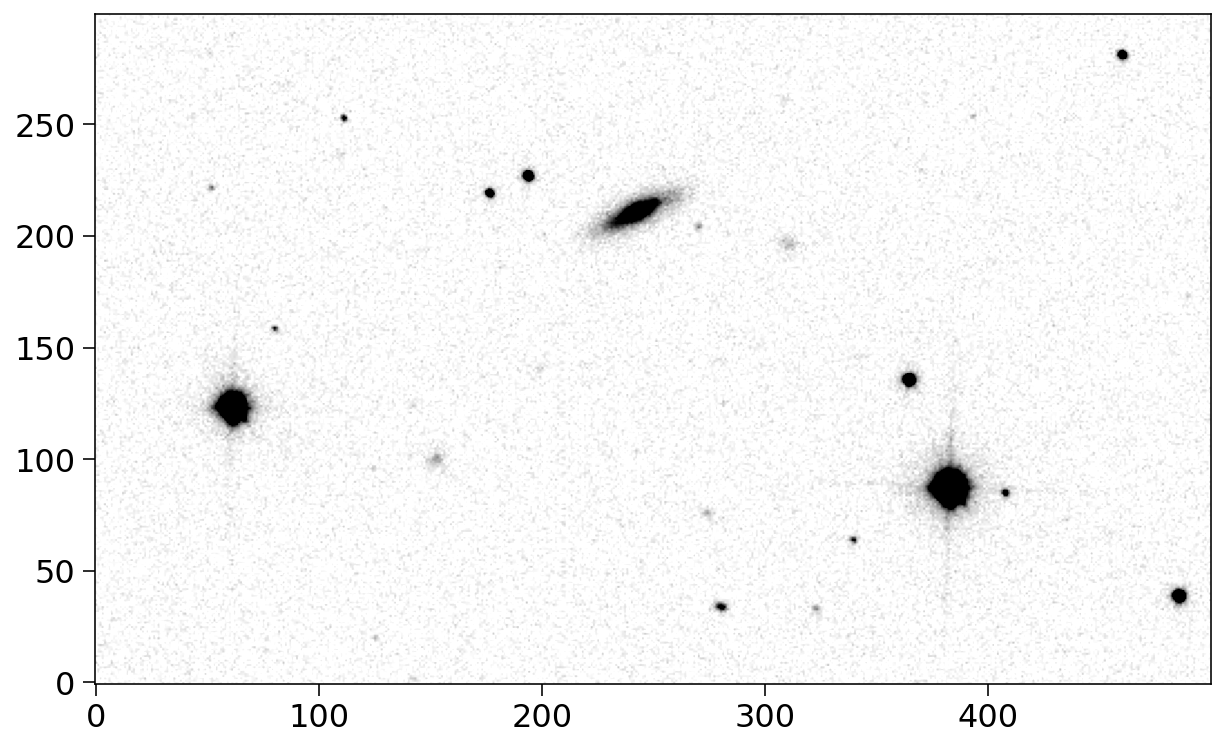

In [5]:
plt.figure(figsize=(10, 8))
plt.imshow(data[1100: 1400, 900:1400], origin='lower', vmin=0, vmax=std, cmap='gray_r')

- DR7 includes ~1.6 M spectra: 900,000 Galaxies, 120,000 QSOs, and 460,000 stars
- These are taken with fibers with a 3" diameter size
- Wavelength coverage: 3800--9200 Angstroms
- R ~ 2000

*Let's discuss about Astronomical spectra*

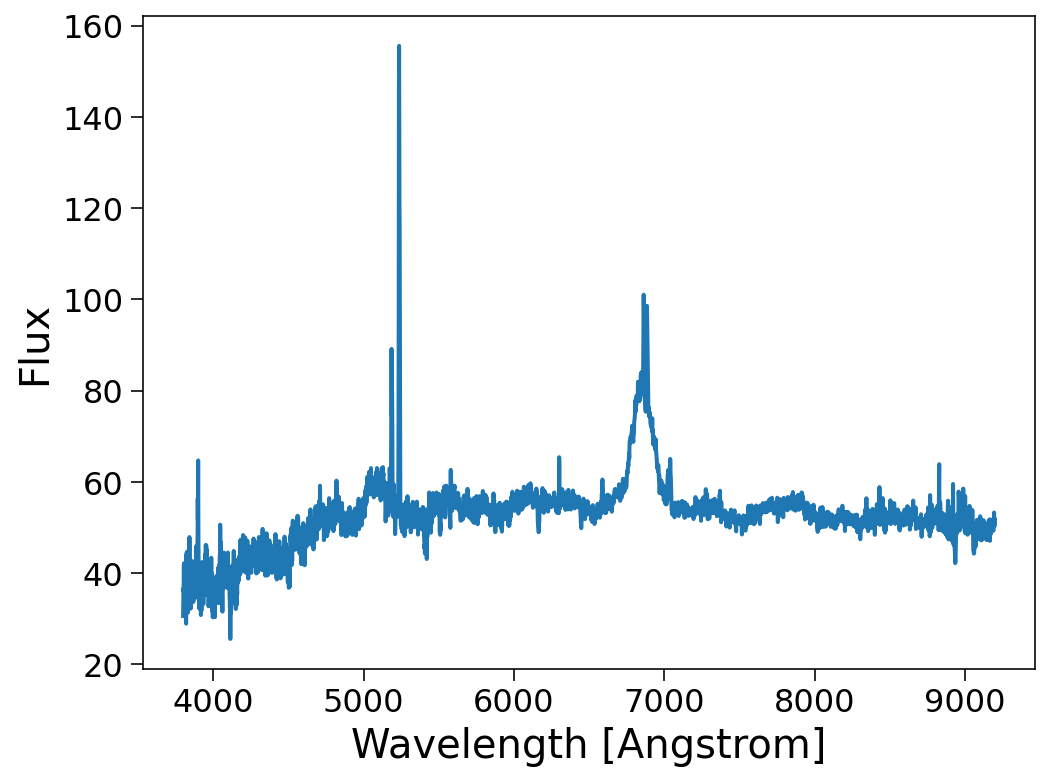

In [6]:
sp = SDSS.get_spectra(matches=xid)

plt.figure(figsize=(8, 6))

plt.plot(10**(sp[0][1].data.loglam), sp[0][1].data.flux)

plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Flux');

- The total size of DR7 is ~60TB
- "Stripe 82" was observed periodically and repeatedly. This is the deepest patch in SDSS but also one with __"time domain"__ information.


SDSS was a pioneer in the development of "data mining" in astronomy and the push of Machine Learning and Big Data tools to get information from its gigantic data set.